TIME SERIES ANALYSIS: ARIMA & SARIMA MODEL

In [13]:
# CASE 1

!pip install pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import pandas as pd

# Load your data
url = "Week 11_Case_Electric_Production.csv"
df = pd.read_csv(url)
y = df['IPG2211A2N']
y

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

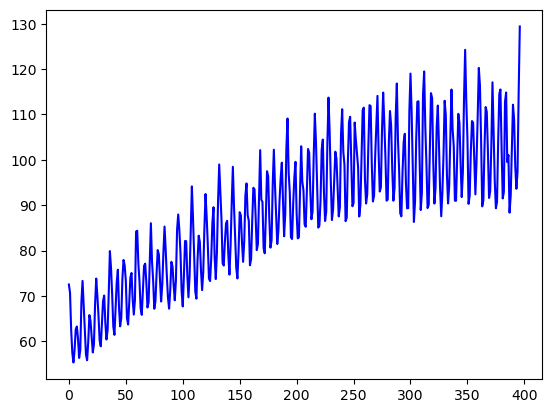

In [25]:
# Visualize the data
x = np.arange(y.shape[0])
plt.plot(x, y, c='blue')
plt.show()

In [32]:
# Split your data
train, test = train_test_split(y, train_size=150)

In [34]:
y

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [35]:
train

0      72.5052
1      70.6720
2      62.4502
3      57.4714
4      55.3151
        ...   
145    89.7795
146    83.0125
147    76.1476
148    73.8471
149    79.7645
Name: IPG2211A2N, Length: 150, dtype: float64

In [36]:
test

150     88.4519
151     87.7828
152     81.9386
153     77.5027
154     82.0448
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 247, dtype: float64

In [37]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12, error_action='ignore')

In [38]:
model

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [39]:
# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

In [40]:
forecasts

150     86.890184
151     88.389082
152     81.548565
153     77.339687
154     82.416339
          ...    
392    120.392212
393    115.975105
394    120.927317
395    130.904211
396    138.283683
Length: 247, dtype: float64

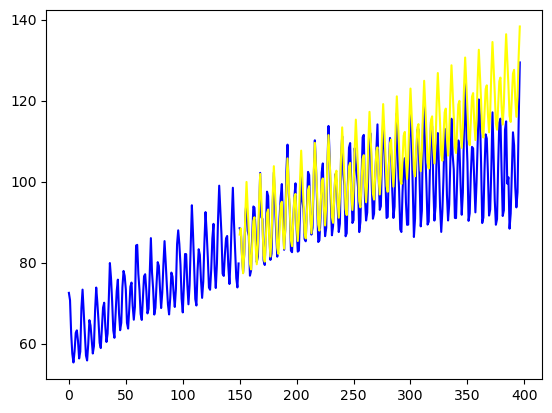

In [41]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], test, c='blue')
plt.plot(x[150:], forecasts, c='yellow')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test, forecasts)

# Print the mean squared error
print("Mean Squared Error: {:0.4f}".format(mse))

Mean Squared Error: 111.7824


In [46]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(test, forecasts)

# Print the mean squared error
print("Mean Absolute Percentage Error:{:0.4f}".format(mape))

Mean Absolute Percentage Error:0.0806
